In [1]:
import tensorflow_datasets as tfds

In [2]:
ds_train = tfds.load('mnist', split = 'train', as_supervised = True)
def transform(f, l):
    return f/255, l
ds_train = ds_train.map(transform)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
feature, _ = next(iter(ds_train.take(1)))

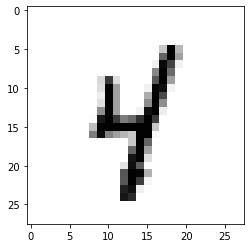

In [4]:
import matplotlib.pyplot as plt
plt.imshow(feature.numpy().reshape(28, 28), cmap = 'Greys')

In [5]:
feature.numpy().ravel()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

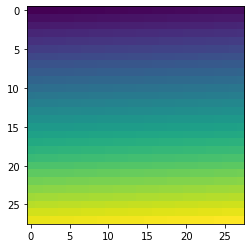

In [6]:
import numpy as np
imagem1 = np.arange(0, 784).reshape(28, 28)
plt.imshow(imagem1)

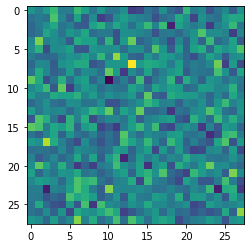

In [7]:
np.random.seed(42)
imagem2 = np.random.normal(size = 784).reshape(28, 28)
plt.imshow(imagem2)

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

In [9]:
gerador = tf.keras.Sequential([
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 128, activation = 'relu'),
                               tf.keras.layers.Dense(units = 784, activation = 'tanh')
                               ])

In [10]:
ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
amostra = gerador(ruido_teste)

In [11]:
amostra.shape

TensorShape([1, 784])

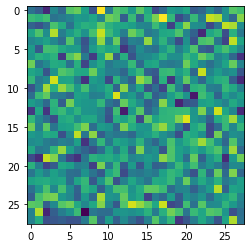

In [12]:
plt.imshow(amostra.numpy().reshape(28, 28))

In [13]:
discriminador = tf.keras.Sequential([
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 128, activation = 'relu'),
                                     tf.keras.layers.Dense(units = 1)
                                     ])

In [14]:
features, _ = next(iter(ds_train.batch(100)))
features.shape

TensorShape([100, 28, 28, 1])

In [15]:
features = tf.reshape(features, shape = (-1, 784))
logits = discriminador(features)
logits.shape

TensorShape([100, 1])

In [16]:
logits

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[ 0.18297853],
       [ 0.17830989],
       [-0.34698242],
       [-0.12812884],
       [-0.13397393],
       [-0.23618507],
       [ 0.09759836],
       [ 0.12691942],
       [ 0.13534722],
       [-0.4226234 ],
       [-0.01353536],
       [-0.25346333],
       [-0.18107136],
       [ 0.2171424 ],
       [-0.45347327],
       [-0.06052269],
       [-0.23140463],
       [-0.19683117],
       [-0.21485282],
       [-0.03403726],
       [-0.23020448],
       [-0.25743145],
       [-0.3055495 ],
       [-0.21032166],
       [-0.14394657],
       [-0.16955084],
       [-0.15790637],
       [-0.2408015 ],
       [-0.1121179 ],
       [ 0.02675568],
       [ 0.00741138],
       [-0.4790987 ],
       [-0.29772997],
       [-0.07231362],
       [-0.12896495],
       [-0.19361229],
       [-0.03965408],
       [-0.24924135],
       [-0.27436423],
       [-0.3280425 ],
       [ 0.2552184 ],
       [-0.09693013],
       [ 0.06325641],
    

In [17]:
tf.nn.sigmoid(logits)

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.5456174 ],
       [0.54445976],
       [0.41411436],
       [0.46801156],
       [0.46655652],
       [0.4412267 ],
       [0.52438027],
       [0.5316873 ],
       [0.5337852 ],
       [0.39588916],
       [0.4966162 ],
       [0.43697125],
       [0.45485544],
       [0.5540733 ],
       [0.3885353 ],
       [0.48487395],
       [0.44240564],
       [0.45095047],
       [0.44649246],
       [0.4914915 ],
       [0.4427017 ],
       [0.43599522],
       [0.42420143],
       [0.44761255],
       [0.4640754 ],
       [0.45771354],
       [0.46060523],
       [0.44008884],
       [0.47199985],
       [0.50668854],
       [0.5018528 ],
       [0.38246498],
       [0.42611253],
       [0.48192948],
       [0.4678034 ],
       [0.45174757],
       [0.49008778],
       [0.43801025],
       [0.431836  ],
       [0.418717  ],
       [0.56346047],
       [0.47578642],
       [0.5158088 ],
       [0.462123  ],
       [0.5258022 ],
     

In [18]:
batch_size = 100
amostras_teste = []
treinamento_discriminador = tf.keras.optimizers.Adam(learning_rate = 0.001)
treinamento_gerador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(300):
    erro_gerador_batch = 0.
    erro_discriminador_batch = 0.
    n_batches = 0
    for X_batch, _ in ds_train.batch(batch_size):
        n_batches += 1

        imagens_reais = tf.reshape(X_batch * 2 - 1, shape = (batch_size, -1))
        batch_ruido = tf.random.uniform(shape = (batch_size, 100), minval = -1, maxval = 1)
        
        with tf.GradientTape() as tape_gerador, tf.GradientTape() as tape_discriminador:
            imagens_ruido = gerador(batch_ruido)

            logits_imagens_reais = discriminador(imagens_reais)
            logits_imagens_ruido = discriminador(imagens_ruido)

            erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_ruido), 
                                                                                  logits = logits_imagens_ruido))
        
            erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(logits_imagens_reais) * 0.9,
                                                                                             logits = logits_imagens_reais))
            erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.zeros_like(logits_imagens_ruido),
                                                                                              logits = logits_imagens_ruido))
            erro_discriminador = erro_discriminador_real + erro_discriminador_ruido
        
        gradients = tape_gerador.gradient(erro_gerador, gerador.trainable_variables)
        treinamento_gerador.apply_gradients(zip(gradients, gerador.trainable_variables))
        
        gradients = tape_discriminador.gradient(erro_discriminador, discriminador.trainable_variables)
        treinamento_discriminador.apply_gradients(zip(gradients, discriminador.trainable_variables))

        erro_gerador_batch += erro_gerador.numpy()
        erro_discriminador_batch += erro_discriminador.numpy()
    
    erro_gerador_batch /= n_batches
    erro_discriminador_batch /= n_batches
    print('época: ' + str(epoca + 1) + ' erro D: ' + str(erro_discriminador_batch) + ' erro G: ' + str(erro_gerador_batch))

    # No final de cada época, gerar uma imagem com o gerador treinado
    ruido_teste = tf.random.uniform(shape = (1, 100), minval = -1, maxval = 1)
    imagem_gerada = gerador(ruido_teste)
    amostras_teste.append(imagem_gerada.numpy().reshape(28, 28))

época: 1 erro D: 0.4329887990653515 erro G: 3.9357505889236926
época: 2 erro D: 0.7209802862008413 erro G: 2.773645018488169
época: 3 erro D: 0.8451857045292854 erro G: 3.0525739151239395
época: 4 erro D: 0.7622854885955651 erro G: 2.851191968123118
época: 5 erro D: 0.951189497411251 erro G: 2.405267495413621
época: 6 erro D: 0.9743952933947245 erro G: 2.2191898570458095
época: 7 erro D: 0.953325982838869 erro G: 2.8460552015900613
época: 8 erro D: 0.9234324915707112 erro G: 2.8421046551068625
época: 9 erro D: 1.001085641682148 erro G: 3.0886814645926157
época: 10 erro D: 0.9267779392500718 erro G: 2.2562776497999826
época: 11 erro D: 1.0263605798284212 erro G: 3.295995282729467
época: 12 erro D: 0.9547314767042796 erro G: 2.337006749510765
época: 13 erro D: 0.9244986497362455 erro G: 1.93145015279452
época: 14 erro D: 0.8376269665857156 erro G: 3.0400395357608794
época: 15 erro D: 0.7338344297309717 erro G: 3.6599164817730587
época: 16 erro D: 0.8238743049403031 erro G: 2.446674082676

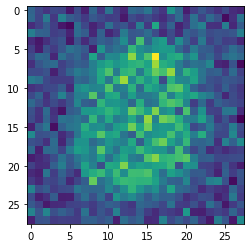

In [19]:
plt.imshow(amostras_teste[0].reshape(28, 28))

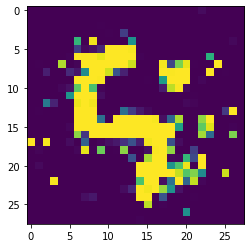

In [20]:
plt.imshow(amostras_teste[100].reshape(28, 28))

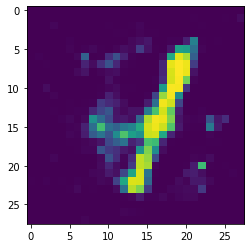

In [21]:
plt.imshow(amostras_teste[200].reshape(28, 28))

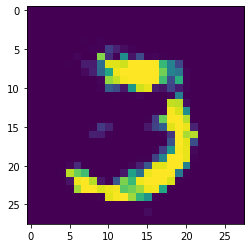

In [22]:
plt.imshow(amostras_teste[-1].reshape(28, 28))